In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d dhaksana/catvsdog

Dataset URL: https://www.kaggle.com/datasets/dhaksana/catvsdog
License(s): apache-2.0
 95% 398M/418M [00:00<00:00, 495MB/s]
100% 418M/418M [00:00<00:00, 552MB/s]


In [3]:
!unzip catvsdog.zip -d CatvsDog


Streaming output truncated to the last 5000 lines.
  inflating: CatvsDog/CatvsDog/train/dog/2507.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2509.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2510.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2511.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2514.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2515.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2518.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2520.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2521.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2523.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2525.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2527.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2529.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2532.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2533.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2537.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2539.jpg  
  inflating: CatvsDog/CatvsDog/train/dog/2541.jpg  
  inflating: 

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img



In [5]:
batch_size = 32
# this is the data augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen= ImageDataGenerator(rescale=1./255)
# this is a generator that will read pictures found in subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen. flow_from_directory(
'CatvsDog/CatvsDog/train',
# this is the target directory
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size,
class_mode= 'binary')

Found 17526 images belonging to 2 classes.


In [6]:
# this is a similar generator, for validation data
validation_generator = test_datagen. flow_from_directory('CatvsDog/CatvsDog/test', target_size=(150, 150), batch_size=batch_size, class_mode= 'binary')

Found 2290 images belonging to 2 classes.


In [7]:
#generator (used for  batch conversion of the large file to get  in RAM  )
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/CatvsDog/CatvsDog/train"
    ,labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(256,256)
)

test_ds=keras.utils.image_dataset_from_directory(
    directory="/content/CatvsDog/CatvsDog/test"
    ,labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(256,256)
)

Found 17526 files belonging to 2 classes.
Found 2290 files belonging to 2 classes.


In [8]:
def process(image,label):
    image=tf.cast(image/255,tf.float32)
    return image,label

train_ds=train_ds.map(process)
validation_ds=test_ds.map(process)

In [9]:
model = Sequential ()
model. add (Conv2D(32, kernel_size=(3,3), padding='valid', activation= 'relu', input_shape= (150, 150, 3)) )
model.add(BatchNormalization())
model. add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model. add (Conv2D(32, kernel_size=(3,3), padding='valid', activation= 'relu') )
model.add(BatchNormalization())
model. add (MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model. add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model. add (MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model. add (Flatten())
model. add (Dense(64, activation='relu'))
model.add(Dropout(0.5))
model. add (Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,213,025 (4.63 MB)

 Trainable params: 1,212,769 (4.63 MB)

 Non-trainable params: 256 (1.00 KB)

In [11]:
model. compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'],jit_compile=True)

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=1000,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=800
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
 548/1000 ━━━━━━━━━━━━━━━━━━━━ 1:34 208ms/step - accuracy: 0.6998 - loss: 0.8725

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 128s 119ms/step - accuracy: 0.7077 - loss: 0.7784 - val_accuracy: 0.6210 - val_loss: 0.6650
Epoch 2/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 112s 112ms/step - accuracy: 0.7364 - loss: 0.5331 - val_accuracy: 0.6624 - val_loss: 0.6222
Epoch 3/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 143s 113ms/step - accuracy: 0.7543 - loss: 0.4894 - val_accuracy: 0.7092 - val_loss: 0.5383
Epoch 4/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 112s 111ms/step - accuracy: 0.7596 - loss: 0.4655 - val_accuracy: 0.6983 - val_loss: 0.5629
Epoch 5/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 110s 110ms/step - accuracy: 0.7677 - loss: 0.4402 - val_accuracy: 0.7502 - val_loss: 0.4990
Epoch 6/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 111s 111ms/step - accuracy: 0.7711 - loss: 0.4191 - val_accuracy: 0.7100 - val_loss: 0.7148
Epoch 7/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 110s 110ms/step - accuracy: 0.7895 - loss: 0.4002 - val_accuracy: 0.7463 - val_loss: 0.5026
Epoch 8/40
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 109s 109ms/step - accuracy: 0.8

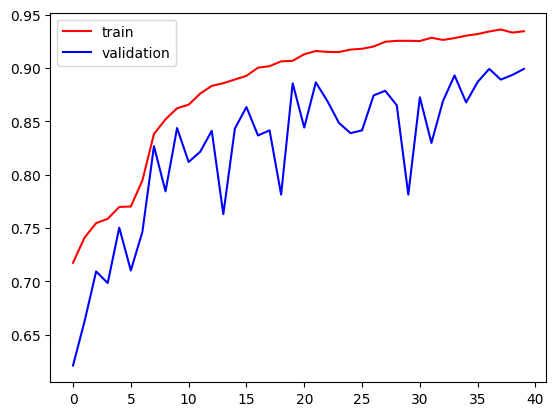

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red',label='train' )
plt.plot (history.history['val_accuracy'], color= 'blue', label='validation')
plt. legend()
plt.show()

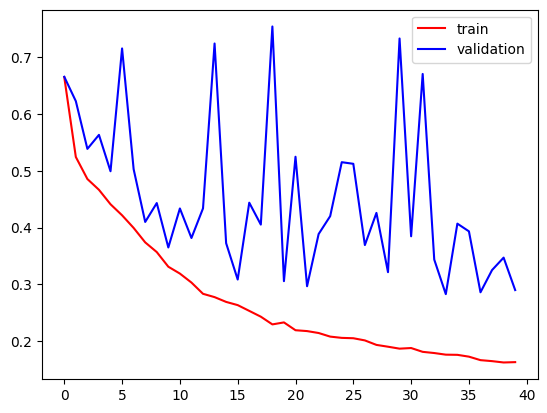

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red',label='train' )
plt.plot (history.history['val_loss'], color= 'blue', label='validation')
plt. legend()
plt.show()

In [15]:
import cv2

In [18]:
test_image=cv2.imread('/content/cat.jpg')

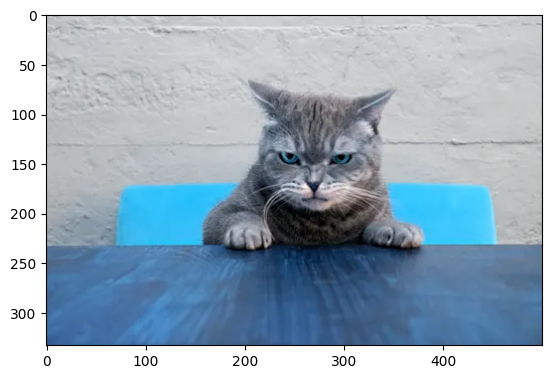

In [19]:
plt.imshow(test_image)

In [23]:
test_image=cv2.resize(test_image,(150,150))

In [24]:
test_input=test_image.reshape(1,150,150,3)

In [26]:
predictions = model.predict(test_input)  # shape: (batch_size, 1) or (batch_size, num_classes)
if predictions[0] ==1 :
    print("Dog")
else:
    print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Cat


#conclusion
>we have got 89.91% accuracy  in 40 epoch we have done data agumentation to the error less as we can use more data to train and also use BatchNormalization,DropOut